In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [4]:
boston = load_boston()

In [11]:
df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
df['target'] = boston['target']

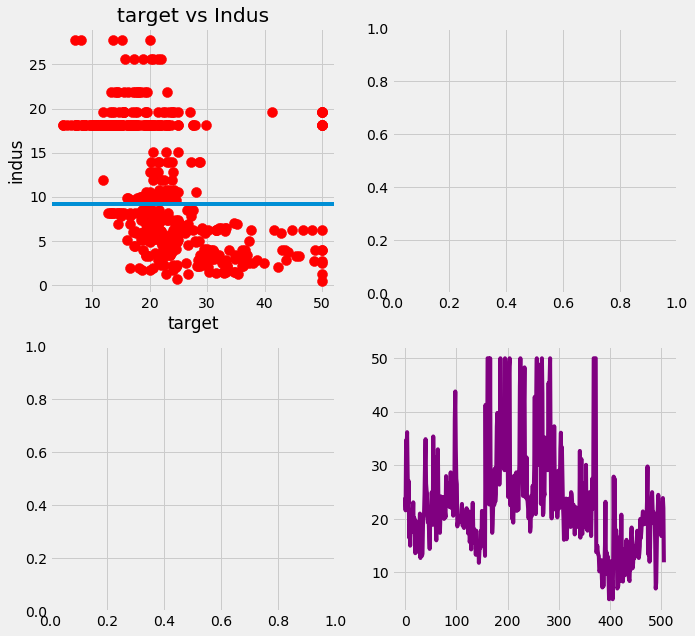

In [30]:
plt.style.use('fivethirtyeight')
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,
                                         ncols=2,
                                         figsize=(10,10))
ax0.scatter(df['target'],df['INDUS'],facecolor='red',s=100)
ax0.set(title='target vs Indus',
       xlabel='target',
       ylabel='indus')
ax0.axhline(df['target'].std())


ax3.plot(df['target'], color='purple')

## Making the simple model without cross validation.

In [40]:
#making the outcome reuseable
np.random.seed(42)

#dividing the data into x and y
x = df.drop('target',axis=1)
y = df['target']

#spliting the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#choosing the machine learning model

model = RandomForestRegressor()

#fitting the data into model
model.fit(x_train,y_train)

#scoring the test set using the fitted model

model.score(x_test,y_test)

#making predictions

y_preds = model.predict(x_test)
y_preds.mean()

21.295264705882357

In [41]:
y_test.mean()

21.488235294117654